In [1]:
from matplotlib import pyplot as plt
from skimage.color import rgb2hed, hed2rgb
from skimage import img_as_float, img_as_ubyte
from skimage import data, io, filters, exposure
from skimage import util
import matplotlib as mp
import numpy as np
import math as mt
from IPython.display import Image

from pylab import *
from scipy import *

from ipywidgets import *

%matplotlib inline 

from signals import changeX, changeY, Scenario, Signal, getFinalSignal, plotSingle, plotAllWithNoiseCancel, plotSpectrogram, plotAllWithNoiseCancelWithoutSpectrogram, plotSingleWithoutAll, plotSingleWIFFT, plotAllWithoutAll, plotAll

In [2]:
# ROZWAZANY PRZEDZIAL ([T0, T1])
signalScale = [0.0, 20.0]
# WYSWIETLANA SKALA NA WYKRESIE (DZIEDZINA CZASU)
timePlotXScale = [0.0, 20.0]
# WYSWIETLANA SKALA Y (DZIEDZINA CZASU)
timePloyYScale = [-3.0, 3.0] 

# SYGNAL W DZIEDZINIE CZASU

## Podstawowe cechy, czestotliwosc probkowania, Nyquista

**Pytanie** Poniżej możesz zobaczyć sygnał wraz z jego przesunięciem. Wyjaśnij poniższe pojęcia i zaznacz je na wykresie i/lub podaj ich wartość:
a) amplituda
b) częstotliwość
c) faza
d) okres

In [3]:
t = np.linspace(0,2*math.pi,400)
a = np.sin(t)
b = np.cos(t)
c = [0]*400

plt.plot(t, a, t, b, t, c)
plt.show()

**Pytanie** Czy pamiętasz czym jest częstotliwość próbkowania i częstotliwość Nyquista?

In [4]:
def rate_sin(Fs):
    T = 1/Fs # sampling period
    t = 0.1 # seconds of sampling
    N = Fs*t # total points in signal

    # signal information
    freq = 20 # in hertz, the desired natural frequency
    omega = 2*np.pi*freq # angular frequency for sine waves

    t_vec = np.arange(N)*T # time vector for plotting
    y = np.sin(omega*t_vec)
    return t_vec, y

<ipython-input-5-e688e673df2e>:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ys = np.array(y_val).reshape(2,2)
<ipython-input-5-e688e673df2e>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  t_vecs = np.array(t_vec_val).reshape(2,2)


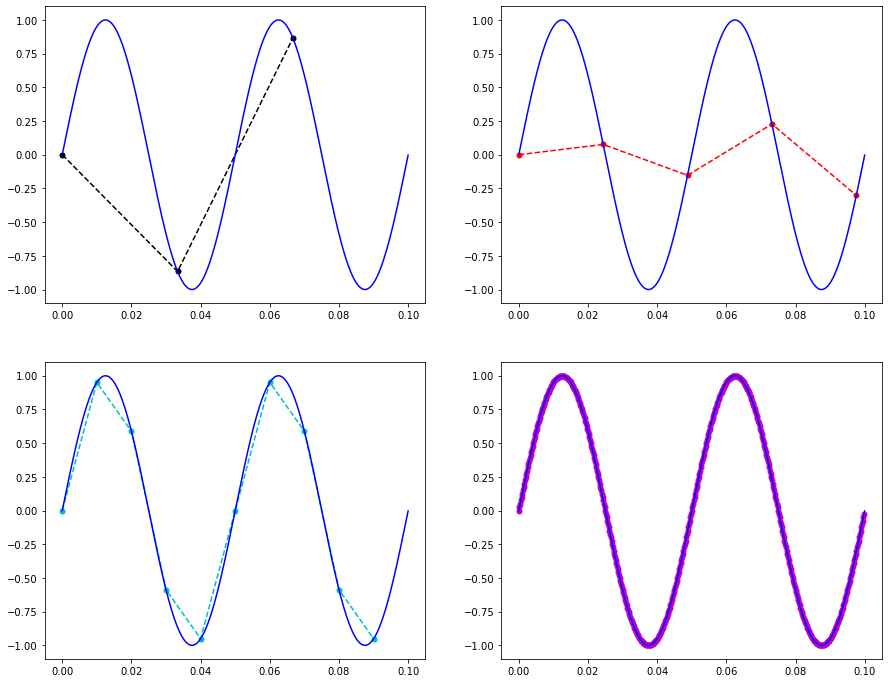

In [5]:
fs = [30, 41, 100, 5000] # sample rate

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15,12))

y_val = []
t_vec_val = []
for i in fs:
    t_vec, y = rate_sin(i)
    y_val.append(y)
    t_vec_val.append(t_vec)
    
ys = np.array(y_val).reshape(2,2)
t_vecs = np.array(t_vec_val).reshape(2,2)

tv, yy = rate_sin(40000)
    
colors = [['ko--', 'ro--'],['co--', 'mo--'] ]
for i, row in enumerate(ax):
    for j, col in enumerate(row):
        col.plot(t_vecs[i][j],ys[i][j], colors[i][j], markersize=5)
        col.plot(tv, yy, 'b')

In [6]:
interact(plotSingleWithoutAll, amplitude=(0.5,2.5,0.1),
         frequency=(0.1, 2.0,0.1),phase = (-2.0 * mt.pi, 2.0*mt.pi, 0.25), 
         yTranslation = (-2.5, 2.5, 0.5), samplingFrequency=(0.25,10,0.25));

interactive(children=(FloatSlider(value=1.0, description='amplitude', max=2.5, min=0.5), FloatSlider(value=0.5…

$$u(t) = A \cdot sin(2\cdot \pi \cdot f_{0} \cdot t + \varphi) + y_{0}$$

Jaka musi być częstotliwość sygnału, aby jego przebieg się (jeden, pełen okres) się skończył w 5s?

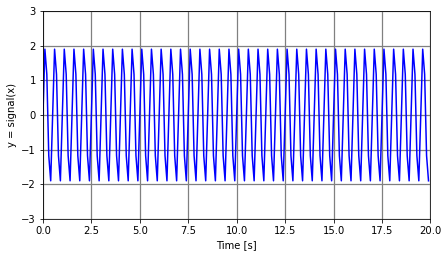

In [7]:
x = 2
plotSingleWithoutAll( 2, frequency = x, phase = 0, yTranslation = 0, samplingFrequency=10)

Jaka musi być częstotliwość sygnału, aby jego przebieg się (jeden, pełen) się skończył w 0.5s?

## Sumowanie sygnałow

In [9]:
sc1 = Scenario([
        Signal(amplitude = 1.0, frequency = 0.5, phase = 0.0, yTranslation = 0.0, color = 'blue'),
        Signal(amplitude = 2.0, frequency = 0.25, phase = 0.0, yTranslation = 0.0, color = 'green') ])
sc2 = Scenario([
        Signal(amplitude = 1.0, frequency = 0.5, phase = 0.0, yTranslation = 0.0, color = 'blue'),
        Signal(amplitude = 1.25, frequency = 0.5, phase = 0.0, yTranslation = 0.0, color = 'green') ])
sc3 = Scenario([
        Signal(amplitude = 1.0, frequency = 0.5, phase = 0.0, yTranslation = 0.0, color = 'blue'),
        Signal(amplitude = 1.0, frequency = 0.5, phase = mt.pi, yTranslation = 0.0, color = 'green') ])



scenarios = {"1. Przyklad": sc1 , "2. Wzmocnienie" : sc2, "3. Tlumienie" : sc3}
interact(plotAllWithoutAll, scenario=scenarios, samplingFrequency=(0.25,10,0.25));



interactive(children=(Dropdown(description='scenario', options={'1. Przyklad': Scenario(), '2. Wzmocnienie': S…

# Sygnal w dziedzinie czestotliwosci

## Omowienie podstaw

In [10]:
#FFT
interact(plotSingleWIFFT, amplitude=(0.5,2.5,0.1),
         frequency=(0.0, 2.0,0.1),phase = (-2.0 * mt.pi, 2.0*mt.pi, 0.25), 
         yTranslation = (-2.5, 2.5, 0.5), samplingFrequency=(0.25,10,0.25));

interactive(children=(FloatSlider(value=1.0, description='amplitude', max=2.5, min=0.5), FloatSlider(value=0.5…

In [11]:
#https://pl.wikipedia.org/wiki/Twierdzenie_Kotielnikowa-Shannona

## Suma sygnalow w dziedzinie czasu a efekt w dziedzinie czasu.

## Odwrotne FFT

In [12]:

 
sc1 = Scenario([
        Signal(amplitude = 1.0, frequency = 0.5, phase = 0.0, yTranslation = 0.0, color = 'blue'),
        Signal(amplitude = 2.0, frequency = 0.25, phase = 0.0, yTranslation = 0.0, color = 'green') ])
sc2 = Scenario([
        Signal(amplitude = 1.0, frequency = 0.5, phase = 0.0, yTranslation = 0.0, color = 'blue'),
        Signal(amplitude = 1.25, frequency = 0.5, phase = 0.0, yTranslation = 0.0, color = 'green') ])
sc3 = Scenario([
        Signal(amplitude = 1.0, frequency = 0.5, phase = 0.0, yTranslation = 0.0, color = 'blue'),
        Signal(amplitude = 1.0, frequency = 0.5, phase = mt.pi, yTranslation = 0.0, color = 'green') ])

scenarios = {"1. Przyklad": sc1 , "2. Wzmocnienie" : sc2, "3. Tlumienie" : sc3}
interact(plotAll, scenario=scenarios, samplingFrequency=(0.25,10,0.25));




interactive(children=(Dropdown(description='scenario', options={'1. Przyklad': Scenario(), '2. Wzmocnienie': S…

In [13]:
x = np.arange(0, 2 * 2*np.pi, 0.1)
y = np.sin(x)
print(y)

[ 0.          0.09983342  0.19866933  0.29552021  0.38941834  0.47942554
  0.56464247  0.64421769  0.71735609  0.78332691  0.84147098  0.89120736
  0.93203909  0.96355819  0.98544973  0.99749499  0.9995736   0.99166481
  0.97384763  0.94630009  0.90929743  0.86320937  0.8084964   0.74570521
  0.67546318  0.59847214  0.51550137  0.42737988  0.33498815  0.23924933
  0.14112001  0.04158066 -0.05837414 -0.15774569 -0.2555411  -0.35078323
 -0.44252044 -0.52983614 -0.61185789 -0.68776616 -0.7568025  -0.81827711
 -0.87157577 -0.91616594 -0.95160207 -0.97753012 -0.993691   -0.99992326
 -0.99616461 -0.98245261 -0.95892427 -0.92581468 -0.88345466 -0.83226744
 -0.77276449 -0.70554033 -0.63126664 -0.55068554 -0.46460218 -0.37387666
 -0.2794155  -0.1821625  -0.0830894   0.0168139   0.1165492   0.21511999
  0.31154136  0.40484992  0.49411335  0.57843976  0.6569866   0.72896904
  0.79366786  0.85043662  0.8987081   0.93799998  0.96791967  0.98816823
  0.99854335  0.99894134  0.98935825  0.96988981  0

In [14]:
yp = np.fft.ifft(np.fft.fft(y))
print(y)

[ 0.          0.09983342  0.19866933  0.29552021  0.38941834  0.47942554
  0.56464247  0.64421769  0.71735609  0.78332691  0.84147098  0.89120736
  0.93203909  0.96355819  0.98544973  0.99749499  0.9995736   0.99166481
  0.97384763  0.94630009  0.90929743  0.86320937  0.8084964   0.74570521
  0.67546318  0.59847214  0.51550137  0.42737988  0.33498815  0.23924933
  0.14112001  0.04158066 -0.05837414 -0.15774569 -0.2555411  -0.35078323
 -0.44252044 -0.52983614 -0.61185789 -0.68776616 -0.7568025  -0.81827711
 -0.87157577 -0.91616594 -0.95160207 -0.97753012 -0.993691   -0.99992326
 -0.99616461 -0.98245261 -0.95892427 -0.92581468 -0.88345466 -0.83226744
 -0.77276449 -0.70554033 -0.63126664 -0.55068554 -0.46460218 -0.37387666
 -0.2794155  -0.1821625  -0.0830894   0.0168139   0.1165492   0.21511999
  0.31154136  0.40484992  0.49411335  0.57843976  0.6569866   0.72896904
  0.79366786  0.85043662  0.8987081   0.93799998  0.96791967  0.98816823
  0.99854335  0.99894134  0.98935825  0.96988981  0

## Fajne zastosowanie FFT i iFFT

In [15]:

l1 = [
        Signal(amplitude = 1.0, frequency = 0.5, phase = 0.0, yTranslation = 0.0, color = 'blue'),
        Signal(amplitude = 1.5, frequency = 0.25, phase = 0.5 * mt.pi, yTranslation = 0.0, color = 'green'),
        Signal(amplitude = 0.5, frequency = 0.4, phase = 1.25 * mt.pi, yTranslation = 0.0, color = 'orange')]

l2 = [
        Signal(amplitude = 1.0, frequency = 0.5, phase = 0.0, yTranslation = 0.0, color = 'blue'),
        Signal(amplitude = 1.5, frequency = 0.25, phase = 0.5 * mt.pi, yTranslation = 0.0, color = 'green'),
        Signal(amplitude = 0.5, frequency = 0.4, phase = 1.25 * mt.pi, yTranslation = 0.0, color = 'orange')]

for i in range(50):
    amplitude = 0.05 + random.random() * 0.15
    #Round - Uniknięcie błędów numerycznych, co sie stanie po usunieciu round?
    # frequency = round(1.0 + random.random() * 3.0, 1)
    frequency = round(1.0 + random.random() * 3.0, 1) 
    phase = random.random() * mt.pi
    color = 'black'
    l2.append(Signal(amplitude, frequency, phase, 0.0, color))

sc1 = Scenario(l1)
sc2 = Scenario(l2)

scenarios = {"1. Przyklad": sc1, "2. Noise": sc2 }
interact(plotAllWithNoiseCancelWithoutSpectrogram, scenario=scenarios, noiseThreshold=6.0, samplingFrequency=(0.25,10,0.25));


interactive(children=(Dropdown(description='scenario', options={'1. Przyklad': Scenario(), '2. Noise': Scenari…

In [16]:
a = np.eye(4)
print(a)

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [17]:
fd = np.fft.fft2(a)
print(fd)

[[4.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 4.+0.j]
 [0.+0.j 0.+0.j 4.+0.j 0.+0.j]
 [0.+0.j 4.+0.j 0.+0.j 0.+0.j]]


In [18]:
d = np.fft.ifft2(fd)
print(d)

[[1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]]


In [19]:
d = np.fft.ifft2(fd)
print(np.abs(d))

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


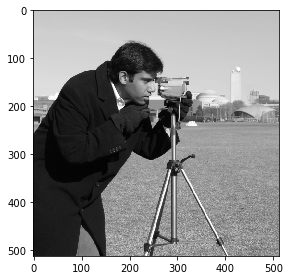

In [20]:
cam = img_as_float(data.camera())
io.imshow(cam)

In [21]:
#imgProc = util.random_noise(cam, mode='s&p', amount=0.3)  
#imgProc = util.random_noise(cam, mode='gaussian', mean=0, var=0.2)

imgProc = np.empty_like(cam)
imgProc[:] = cam

for y in range(0, imgProc.shape[0]):
    phi = (random.random() * 100)
    freq = 0.2 + random.random() * 0.5
    for x in range(0, imgProc.shape[1]):
        ab = 0.3 * sin(2*np.pi * freq * x + phi)
        #imgProc[y][x] = ab
        imgProc[y][x] += ab


#io.imshow(imgProc,cmap='gray', interpolation='none')
fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(imgProc,cmap='gray', interpolation='none', extent=[80,130,32,0])
ax.set_aspect(2) # you may also use am.imshow(..., aspect="auto") to restore the

<ipython-input-21-2fe580252313>:11: DeprecationWarning: scipy.sin is deprecated and will be removed in SciPy 2.0.0, use numpy.sin instead
  ab = 0.3 * sin(2*np.pi * freq * x + phi)


In [22]:
fd = np.fft.fft2(imgProc)

In [23]:
fdp = np.abs(fd)
print(fdp)

[[132677.07535914  25016.60838305   6147.11709598 ...   4085.52916886
    6147.11709598  25016.60838305]
 [ 25066.65417129  19541.75343598   9145.32163144 ...    808.97141446
    6738.43083639   3152.60558925]
 [ 11137.55329964   3613.4198853    6904.25438954 ...   1428.41869862
    1122.98196133   2107.941468  ]
 ...
 [  4992.42635006   1904.49286412   3504.60795915 ...   4361.64845702
    5873.82753665   6273.63999646]
 [ 11137.55329964   2107.941468     1122.98196133 ...   4051.91436462
    6904.25438954   3613.4198853 ]
 [ 25066.65417129   3152.60558925   6738.43083639 ...   2051.06194541
    9145.32163144  19541.75343598]]


In [24]:
m = np.max(fdp)
copy = fdp / m
print(np.mean(copy))
norm = (copy - 0) / (0.01 - 0)
norm[norm > 1] = 1
norm[norm < 0] = 0
plt.imshow(norm)

0.0006906887627903621


(512, 512)


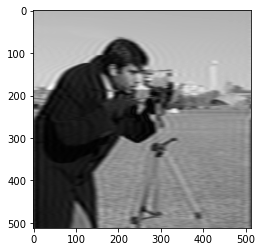

In [25]:
print(fd.shape)
w = fd.shape[1]
h = fd.shape[0]

prop = 0.9
copy = np.empty_like(fd)
copy[:] = fd

#copy[int(h/2 - h/2 * prop): int(h/2 + h/2* prop), int(w/2 - w/2 * prop): int(w/2 + w/2* prop)] = 0
copy[0:h, int(w/2 - w/2 * prop): int(w/2 + w/2* prop)] = 0



new_img = np.fft.ifft2(copy)
#print(new_img)
plt.imshow(np.abs(new_img),cmap='gray')

Pojedynczy sygnal - zmienny w czasie

In [27]:


sc1 = Scenario([
        Signal(amplitude = 1.0, frequency = 0.5, phase = 0.0, yTranslation = 0.0, color = 'blue', 
               changeX=changeX(5,15,10))])
sc2 = Scenario([
        Signal(amplitude = 1.0, frequency = 0.5, phase = 0.0, yTranslation = 0.0, color = 'blue', 
               changeY=changeY(5,15,1))])
sc3 = Scenario([
        Signal(amplitude = 1.0, frequency = 0.5, phase = 0.0, yTranslation = 0.0, color = 'blue', 
               changeX=changeX(10,20,10), changeY=changeY(0,10,1))])


scenarios = {"1. Zmienna czestotliwosc": sc1 , "2. Zmiena amplituda/wychylenie" : sc2, "3. Mix" : sc3}
interact(plotAll, scenario=scenarios, samplingFrequency=(0.25,10,0.25));




interactive(children=(Dropdown(description='scenario', options={'1. Zmienna czestotliwosc': Scenario(), '2. Zm…

## Spectrogram

In [28]:

sc1 = Scenario([
        Signal(amplitude = 1.0, frequency = 0.5, phase = 0.0, yTranslation = 0.0, color = 'blue', 
               changeX=changeX(5,15,10))])
sc2 = Scenario([
        Signal(amplitude = 1.0, frequency = 0.5, phase = 0.0, yTranslation = 0.0, color = 'blue', 
               changeY=changeY(5,15,1))])
sc3 = Scenario([
        Signal(amplitude = 1.0, frequency = 0.5, phase = 0.0, yTranslation = 0.0, color = 'blue', 
               changeX=changeX(10,20,10), changeY=changeY(0,10,1))])

scenarios = {"1. Czestotliwosc": sc1, "2. Amplituda": sc2, "3. Mix": sc3   }
interact(plotSpectrogram, scenario=scenarios, samplingFrequency=(0.25,10,0.25), windowSize=(4.0,10.0,0.25), 
         windowJump=(0.25,2.0,0.25));


interactive(children=(Dropdown(description='scenario', options={'1. Czestotliwosc': Scenario(), '2. Amplituda'…

In [25]:
#https://pl.wikipedia.org/wiki/Okno_czasowe